In [141]:
import numpy as np
import pylab
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as mtick
%matplotlib inline
import datetime
from datetime import date
import seaborn as sb
import time
import scipy.stats as stats
from scipy.stats import mstats
from scipy.stats import ttest_ind
from scipy import stats
import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("Set2", 10)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from scipy import stats

In [45]:
Batting = pd.read_csv('/Users/ezzan/Downloads/python_drills/Batting.csv')
Pitching = pd.read_csv('/Users/ezzan/Downloads/python_drills/Pitching.csv')
Salary= pd.read_csv('/Users/ezzan/Downloads/python_drills/Salaries.csv')
Award = pd.read_csv('/Users/ezzan/Downloads/python_drills/AwardsPlayers.csv')
Team = pd.read_csv('/Users/ezzan/Downloads/python_drills/Teams.csv')
HOF = pd.read_csv('/Users/ezzan/Downloads/python_drills/HallOfFame.csv')
AllStar= pd.read_csv('/Users/ezzan/Downloads/python_drills/AllstarFull.csv')
Fielding =pd.read_csv('/Users/ezzan/Downloads/python_drills/Fielding.csv')
Full =pd.read_csv('/Users/ezzan/Downloads/python_drills/Master.csv')
Appearances = pd.read_csv('/Users/ezzan/Downloads/python_drills/Appearances.csv')
Awards = pd.read_csv('/Users/ezzan/Downloads/python_drills/AwardsPlayers.csv')

In [46]:
HOF= HOF.sort_values('playerID')
HOF.drop(['needed_note'], axis=1, inplace=True)
HOF = HOF.loc[lambda HOF: HOF['category'] == 'Player', :]
HOF = HOF.loc[lambda HOF: HOF['inducted'] == 'Y', :]
Batting.drop(['CS','SH', 'GIDP', 'IBB'], axis=1, inplace=True)

In [47]:
HOF2 = HOF.loc[lambda HOF: HOF['inducted'] == 'N', :]

In [48]:
inductees = HOF.playerID.unique()
rejected = HOF2.playerID.unique()

In [49]:
#HOF= pd.merge(HOF, Batting, left_index=True, right_index=True, on='playerID', how='outer');
HOF = HOF.loc[lambda HOF: HOF['inducted'] == 'Y', :]
#HOF = HOF.merge(Batting, on='playerID',how='inner')
#HOF= HOF.loc[lambda HOF1: HOF1['category']=='Player']

In [50]:
#master1 = master1.loc[lambda master1: master1['category'] == 'Player', :]
#HOF1 = HOF1.loc[lambda HOF1: HOF1['votedBY'] != 'Negro League', :]
MasterID = pd.merge(Batting, HOF, on='playerID')
#HOF= HOF1.sort_values('playerID')
MasterID["avg."]=MasterID.H/MasterID.AB
MasterID["1B"]=(MasterID.H-MasterID["3B"]-MasterID["2B"])
MasterID["OBP"]= (MasterID.H + MasterID.BB + MasterID.HBP ) / (MasterID.AB + MasterID.BB + MasterID.HBP + MasterID.SF)
MasterID["OBP"]= (MasterID.H + MasterID.BB + MasterID.HBP ) / (MasterID.AB + MasterID.BB + MasterID.HBP + MasterID.SF)
MasterID["slug"]=(MasterID["1B"] + 2*MasterID["2B"] + MasterID["3B"]*3 + 4*MasterID.HR)/MasterID.AB
MasterID["OPS"] = MasterID.OBP + MasterID.slug


#HOF.drop(['teamID', 'lgID','ballots','needed', 'votes'], axis=1, inplace=True)
#Master1.drop(['category'])
#HOF1=HOF1.groupby(['playerID'])['HR']
MasterID = MasterID.sort_values('playerID')
careerstats = MasterID.groupby(['playerID']).sum()
seasonsplayed = MasterID.playerID.value_counts()
careerstats["Career Avg."] = careerstats['H']/careerstats['AB']
careerstats.drop(['yearID', 'yearid', 'ballots', 'needed', 'votes', 'avg.', 'OBP', 'slug', 'OPS'], axis=1, inplace=True)
careerstats["OBP"]= (careerstats.H + careerstats.BB + careerstats.HBP ) / (careerstats.AB + careerstats.BB + careerstats.HBP + careerstats.SF)
careerstats["slug"]=( careerstats["1B"] + 2* careerstats["2B"] +  careerstats["3B"]*3 + 4* careerstats.HR)/ careerstats.AB
careerstats["OPS"] =  careerstats.OBP +  careerstats.slug
careerstats['admitted'] = 1
neveradmitted['admitted'] = 0
careerstats.head(5)


,stint,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,HBP,SF,1B,Career Avg.,OBP,slug,OPS,admitted
playerID,,,,,,,,,,,,,,,,,,,,
aaronha01,23,3298,12364,2174,3771,624,98,755,2297.0,240.0,1402,1383.0,32.0,121.0,3049,0.304998,0.373949,0.615577,0.989527,1
alexape01,22,703,1810,154,378,60,13,11,163.0,3.0,77,276.0,2.0,0.0,305,0.208840,0.241927,0.280663,0.522590,1
alomaro01,21,2379,9073,1508,2724,504,80,210,1134.0,474.0,1032,1140.0,50.0,97.0,2140,0.300231,0.371245,0.465998,0.837243,1
ansonca01,27,2523,10277,1996,3418,581,142,97,2076.0,276.0,983,302.0,32.0,0.0,2695,0.332587,0.392579,0.454510,0.847089,1
aparilu01,18,2601,10230,1335,2677,394,92,83,791.0,506.0,736,742.0,27.0,76.0,2191,0.261681,0.310778,0.350635,0.661413,1


In [56]:
frames = [careerstats,neveradmitted]
result = pd.concat(frames)

C:\Users\ezzan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


In [58]:

result = result.sort_index()

result = result.dropna(axis = 1)
result["Career Avg."] = result['H']/result["AB"]

result.tail(100)


,1B,2B,3B,AB,BB,Career Avg.,G,H,HBP,HR,OBP,OPS,R,RBI,SB,SF,SO,admitted,slug,stint
playerID,,,,,,,,,,,,,,,,,,,,
lombaer01,1488.0,277,27,5855,430,0.306063,1853,1792,46.0,190,0.358237,0.850637,601,990.0,8.0,0.0,262.0,1,0.492400,17
lyonste01,306.0,49,9,1563,73,0.232885,705,364,7.0,5,0.270237,0.558785,162,149.0,0.0,0.0,201.0,1,0.288548,21
maddugr01,235.0,35,2,1591,34,0.170962,759,272,5.0,5,0.190564,0.398609,103,84.0,11.0,2.0,419.0,1,0.208045,27
mantlmi01,1999.0,344,72,8102,1733,0.298075,2401,2415,13.0,536,0.420515,1.043448,1677,1509.0,153.0,47.0,1710.0,1,0.622933,18
manushe01,1873.0,491,160,7654,506,0.329762,2008,2524,70.0,110,0.376671,0.869877,1287,1183.0,114.0,0.0,345.0,1,0.493206,21
maranra01,2048.0,380,177,10078,839,0.258484,2670,2605,39.0,28,0.317908,0.660337,1255,884.0,291.0,0.0,756.0,1,0.342429,23
maricju01,171.0,29,2,1221,38,0.165438,475,202,2.0,4,0.190852,0.396421,73,75.0,2.0,7.0,269.0,1,0.205569,16
marquru01,178.0,17,3,1107,33,0.178862,536,198,7.0,1,0.207498,0.410750,63,64.0,6.0,0.0,191.0,1,0.203252,20
martipe02,35.0,6,2,434,15,0.099078,477,43,3.0,0,0.134066,0.256186,22,18.0,0.0,3.0,190.0,1,0.122120,18


Text(0.5,0,'Hrs Hit by Hall of Famers per season')

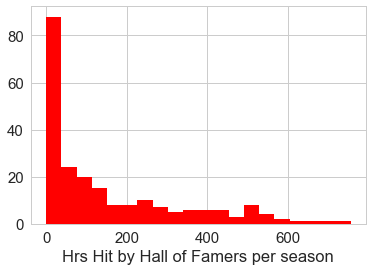

In [59]:
import matplotlib.pyplot as plt
plt.hist(careerstats['HR'].dropna(),bins=20, color = 'red')
plt.xlabel('Hrs Hit by Hall of Famers per season')


Text(0.5,0,'RBI by Hall of Famers')

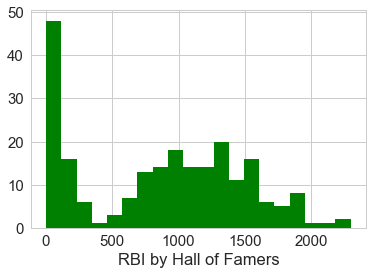

In [60]:
plt.hist(careerstats['RBI'].dropna(),bins=20, color = 'green')
plt.xlabel('RBI by Hall of Famers')

Text(0.5,0,'Career Hits by Hall of Famers')

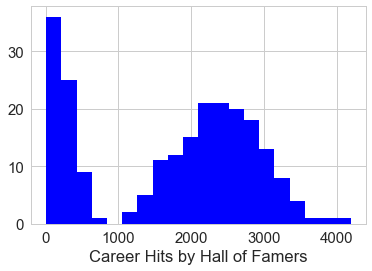

In [61]:
plt.hist(careerstats['H'].dropna(),bins = 20, color = 'blue')
plt.xlabel('Career Hits by Hall of Famers')

Text(0.5,0,'OBP by Hall of Famers')

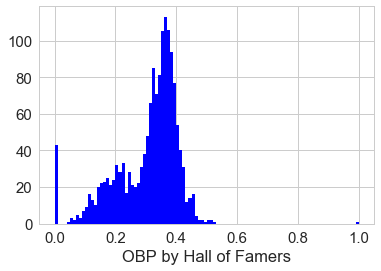

In [62]:
plt.hist(MasterID['OBP'].dropna(),bins=100, color = 'blue')
plt.xlabel('OBP by Hall of Famers')

Text(0.5,0,'Slugging Percentage by Hall of Famers per 100 games or more')

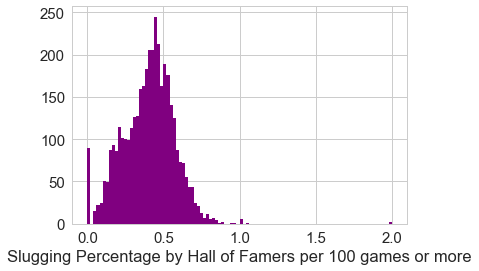

In [63]:
plt.hist(MasterID['slug'].dropna(),bins=100, color = 'purple')
plt.xlabel('Slugging Percentage by Hall of Famers per 100 games or more')

Text(0.5,0,'OPS by Hall of Famers per 100 games or more')

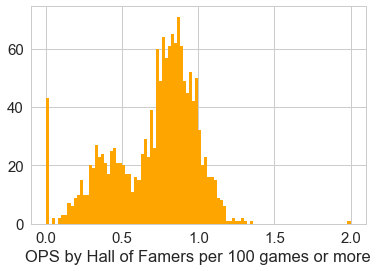

In [64]:
plt.hist(MasterID['OPS'].dropna(),bins=100, color = 'orange')
plt.xlabel('OPS by Hall of Famers per 100 games or more')

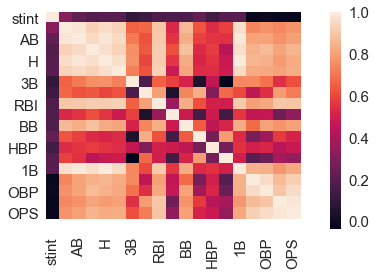

In [65]:
sb.heatmap(careerstats.corr())

#  Linear Regression

In [108]:

 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

Y = result['admitted'== "Y"]
X = result['HR']
 
X=X.values.reshape(len(X),1)
Y=Y.values.reshape(len(Y),1)   
 
# Split the data into training/testing sets
X_train = X[:-400]
X_test = X[-400:]
 
# Split the targets into training/testing sets
Y_train = Y[:-400]
Y_test = Y[-400:]
 
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.title('Test Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.xticks(())
plt.yticks(())

# Create linear regression object
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(X_train, Y_train)
 
# Plot outputs
plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3)



plt.show()

KeyError: False

In [89]:
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [91]:
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(179, 7) (179,)
(45, 7) (56,)


In [95]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, Y_train)
predictions = lm.predict(X_test)

In [96]:
predictions[0:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

ValueError: x and y must be the same size

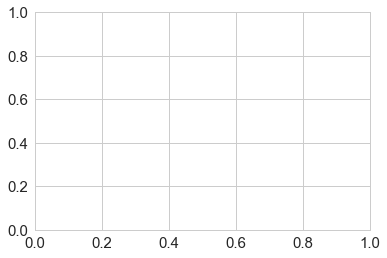

In [97]:
plt.scatter(Y_test, predictions)

In [88]:
print (model.score(X_test,Y_test))

1.0


In [98]:
lr = LogisticRegression(C=1e9)


# Fit the model.
fit = lr.fit(X, Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_Y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_Y_sklearn, Y))

print('\n Percentage accuracy')
print(lr.score(X, Y))

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

# KNN Predictor

In [70]:
result.columns

Index(['1B', '2B', '3B', 'AB', 'BB', 'Career Avg.', 'G', 'H', 'HBP', 'HR',
       'OBP', 'OPS', 'R', 'RBI', 'SB', 'SF', 'SO', 'admitted', 'slug',
       'stint'],
      dtype='object')

In [148]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=1)
X = result[['HR','RBI', "Career Avg.", "H", "2B", "3B", "SB"]]
Y = result.admitted
KNN.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [167]:

print(KNN.predict([[240, 190, .286, 1000, 300, 100, 100]]))
print(KNN.predict_proba([[240, 190, .286, 1000, 300, 100, 100]]))

[1]
[[1.]]


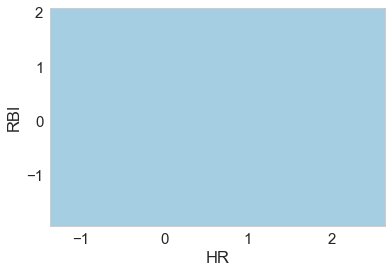

In [168]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

KNN = KNeighborsClassifier(n_neighbors=5, weights='distance')
KNN1 = KNeighborsClassifier(n_neighbors=5)

# Our input data frame will be the z-scores this time instead of raw data.
X = pd.DataFrame({
    'HR': stats.zscore(result.HR),
    'RBI': stats.zscore(result.RBI)
})

# Fit our model.
Y = result.admitted
KNN.fit(X, Y)

# Arrays, not data frames, for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 4.0
# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = KNN.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('HR')
plt.ylabel('RBI')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [169]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

score = cross_val_score(KNN, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

score1 = cross_val_score(KNN1, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score1.mean(), score1.std() * 2))

Unweighted Accuracy: 1.00 (+/- 0.00)
Unweighted Accuracy: 1.00 (+/- 0.00)


In [170]:
knn20 = neighbors.KNeighborsRegressor(n_neighbors=20)
knn20w = neighbors.KNeighborsRegressor(n_neighbors=20, weights='distance')
score = cross_val_score(knn20, X, Y, cv=5)
print("k = 20, with HR and RBI inputs")
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn20w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

k = 20, with HR and RBI inputs
Unweighted Accuracy: 1.00 (+/- 0.00)
Weighted Accuracy: 1.00 (+/- 0.00)


In [171]:
knn10 = neighbors.KNeighborsRegressor(n_neighbors=10)
knn10w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
score = cross_val_score(knn10, X, Y, cv=5)
print("k = 20, with loudness and duration inputs")
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn10w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

k = 20, with loudness and duration inputs
Unweighted Accuracy: 1.00 (+/- 0.00)
Weighted Accuracy: 1.00 (+/- 0.00)


In [172]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=33)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
KNN.fit(X_train,Y_train)
Y_pred = KNN.predict(X_test)
accuracy_score(Y_test, Y_pred)

#read "make model better"
#support vector
#naive bayes

1.0

In [173]:
from sklearn.svm import SVC

# Instantiate our model and fit the data.
X = result[['HR', 'RBI']]
Y = result[['admitted']]
svm = SVC(kernel = 'linear')
svm.fit(X, Y)


C:\Users\ezzan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: The number of classes has to be greater than one; got 1

In [174]:

y_min, y_max = X.test.min() - 1, X.test.max() + 3
x_min, x_max = X.project.min() - 1, X.project.max() + 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))

Z = (svm.predict(np.c_[xx.ravel(), yy.ravel()])=='pass')

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(test_data.project[0:10], test_data.test[0:10], marker='x')
plt.scatter(test_data.project[10:20], test_data.test[10:20], marker='o')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('HR, RBI')
plt.ylabel('admitted')
plt.title('HOF inductees based on HR and RBI')
plt.show()


AttributeError: 'DataFrame' object has no attribute 'test'

In [176]:
lr = LogisticRegression(C=1e9)


# Fit the model.
fit = lr.fit(X, Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, Y))

print('\n Percentage accuracy')
print(lr.score(X, Y))

C:\Users\ezzan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [177]:
logisticregression = LogisticRegression(C=1e9)

# Fit the model.
fit = logisticregression.fit(X_train, Y_train)
predict_train = fit.predict(X_train)

# Cross-validate.
score = cross_val_score(logisticregression, X_train, Y_train, cv=4)

print(fit.score(X_train,Y_train))
print('\n Accuracy scores:')
print(score)
print('\n Average score:')
print(sum(score)/5)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [178]:
#admitted2 contains al the stats for HOF pitchers

master2= pd.merge(Pitching, HOF, left_index=True, right_index=True, on='playerID', how='inner');
master2 = master2.loc[lambda master2: master2['category'] == 'Player', :]
master2 = pd.merge(Pitching, HOF, on='playerID')
master2= master2.sort_values('playerID')
master2.drop(['teamID', 'lgID', 'votedBy', 'ballots','needed', 'votes'], axis=1, inplace=True)
admitted2 = master2.loc[master2.playerID.isin(inductees)]
admitted3 = master2.loc[~master2.playerID.isin(inductees)]
#admitted2.drop(["needed","yearID", "yearid","teamID", "ballots", "votes", "needed_note", "category", "votedBy"], axis=1, inplace=True)
admitted2 = admitted2.drop_duplicates()
admitted2 = admitted2.groupby(['playerID']).sum()
admitted2

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,yearid
playerID,,,,,,,,,,,,,,,,,,,,,
alexape01,40336,22,373,208,696,599,437,90,32,15570,...,39.0,70.0,1,20928.0,80.0,1851,0.0,0.0,0.0,40698
ansonca01,3767,2,0,1,3,0,0,0,1,12,...,0.0,0.0,0,21.0,3.0,5,0.0,0.0,0.0,3878
becklja01,1902,1,0,1,1,1,0,0,0,12,...,0.0,0.0,0,0.0,0.0,8,0.0,0.0,0.0,1971
bendech01,30575,16,212,127,459,334,255,40,34,9051,...,72.0,102.0,3,10124.0,109.0,1110,0.0,0.0,0.0,31248
blylebe01,47533,26,287,250,692,685,242,60,0,14910,...,114.0,155.0,19,20491.0,3.0,2029,0.0,0.0,0.0,48264
boggswa01,3996,2,0,0,2,0,0,0,0,7,...,0.0,0.0,0,11.0,2.0,1,0.0,0.0,0.0,4010
bresnro01,5708,3,4,1,9,6,3,1,0,151,...,0.0,3.0,0,16.0,3.0,30,0.0,0.0,0.0,5835
broutda01,3762,2,0,2,4,2,2,0,0,69,...,4.0,0.0,0,127.0,1.0,37,0.0,0.0,0.0,3890
brownmo01,28647,16,239,130,481,332,271,55,49,9517,...,59.0,63.0,4,12642.0,138.0,1044,0.0,0.0,0.0,29235


In [84]:
#neveradmitted2 contains all stats for not inducted pitchers

master3= pd.merge(Pitching, HOF2, left_index=True, right_index=True, on='playerID', how='inner');
master3 = master3.loc[lambda master3: master3['category'] == 'Player', :]
master3 = pd.merge(Pitching, HOF2, on='playerID')
master3= master3.sort_values('playerID')
#master3.drop(['teamID', 'lgID', 'votedBy', 'ballots','needed', 'votes'], axis=1, inplace=True)
admitted2 = master3.loc[master3.playerID.isin(inductees)]
neveradmitted2 = master3.loc[~master3.playerID.isin(inductees)]
#neveradmitted2.drop(["needed","yearID", "yearid","teamID", "ballots", "votes", "needed_note", "category", "votedBy"], axis=1, inplace=True)
neveradmitted2 = neveradmitted2.drop_duplicates()
neveradmitted2 = neveradmitted2.groupby(['playerID']).sum()


,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,...,BFP,GF,R,SH,SF,GIDP,yearid,ballots,needed,votes
playerID,,,,,,,,,,,,,,,,,,,,,


## The National Baseball Hall of Fame and Museum is located in Cooperstown, New York and was dedicated in 1939. A baseball player can be elected to the Hall of Fame if they meet the following criteria:

-The player must have competed in at least ten seasons;

-The player has been retired for at least five seasons;

-A screening committee must approve the player’s worthiness to be included on the ballot and most players who played regularly for ten or more years are deemed worthy;

-The player must not be on the ineligible list (that means that the player should not be banned from baseball);

-A player is considered elected if he receives at least 75% of the vote in the election; and

-A player stays on the ballot the following year if they receive at least 5% of the vote and can appear on ballots for a maximum of 10 years.

In [42]:
HOF2 = HOF.loc[lambda HOF: HOF['category'] == 'Player', :]
HOF2 = HOF.loc[lambda HOF: HOF['inducted'] == 'N', :]

In [81]:

#neveramitted players who were not admitted to HOF
MasterID1 = pd.merge(Batting, HOF2, on='playerID', how="outer")
#MasterID1 = MasterID1.loc[lambda MasterID1: MasterID1['yearID'] > 1980, :]
MasterID1 = MasterID1.loc[lambda MasterID1: MasterID1['yearid'] > 2005, :]
# = MasterID1.loc[lambda MasterID1: MasterID1['votes'] > 10, :]
MasterID1= MasterID1.sort_values('votes', ascending = False)
admitted = MasterID1.loc[MasterID1.playerID.isin(inductees)]
neveradmitted = MasterID1.loc[~MasterID1.playerID.isin(inductees)]
#neveradmitted.drop(["needed","yearid","yearID", "teamID", "ballots", "votes", "needed_note", "category","avg.", "votedBy"], axis=1, inplace=True)
neveradmitted = neveradmitted.drop_duplicates()
neveradmitted = neveradmitted.groupby(['playerID']).sum()
neveradmitted.head(100)

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,HBP,SF,yearid,ballots,needed,votes
playerID,,,,,,,,,,,,,,,,,,,


In [83]:
neveradmitted

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,HBP,SF,yearid,ballots,needed,votes
playerID,,,,,,,,,,,,,,,,,,,
